<a href="https://colab.research.google.com/github/LuigiSigillo/CartoonGAN/blob/main/DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartoonGAN-TensorFlow
Cartoonize your images using CartoonGAN, powered by TensorFlow 2.0. 

- [Report](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2-en.html)
- [Github repo](https://github.com/LuigiSigillo/CartoonGan)

#TODO mmagine risutalti

## Clone github  repo
This repo contain the Python script that we will use to generate cartoon-style images.

In [2]:
import os
!git clone https://github.com/LuigiSigillo/CartoonGan.git
os.chdir(os.path.join("CartoonGan"))

Cloning into 'CartoonGan'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 267 (delta 22), reused 0 (delta 0), pack-reused 231
Receiving objects: 100% (267/267), 56.90 MiB | 34.24 MiB/s, done.
Resolving deltas: 100% (108/108), done.


## Install packages
We will need TensorFlow 2.0 and [keras-contrib](https://github.com/keras-team/keras-contrib) packages.

In [3]:
from IPython.display import clear_output, display, Image
import tensorflow as tf


In [4]:
!pip install tensorflow_addons


     |████████████████████████████████| 706kB 29.5MB/s 


## Download new images to cartoonize
Get url of the image that you wish to transform, and paste it in the form below. You can also keep the default url and see how it work. 

Supported format of the images:
- `.jpg`
- `.png`


In [12]:
image_url = 'https://i.imgur.com/gPPKRY8.jpg'  #@param ["https://i.imgur.com/ok1wbXo.jpg","https://i.imgur.com/gPPKRY8.jpg"]

Download the image from the web and save it for transformation. You don't need to know all the detail here now.

In [14]:
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")
!mkdir {input_image_dir} && mkdir {output_image_dir}
import time
if image_url:
    img_filename = image_url.split("/")[-1]
    name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
    new_name = '_'.join((name, str(int(time.time()))))
    new_img_filename = '.'.join((new_name, ext))
    image_path = os.path.join(input_image_dir, new_img_filename)
    
    !wget {image_url} \
        && mv {img_filename} {new_img_filename} \
        && mv {new_img_filename} {image_path}

--2021-03-11 12:53:56--  https://i.imgur.com/gPPKRY8.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.248.193
Connecting to i.imgur.com (i.imgur.com)|151.101.248.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48313 (47K) [image/jpeg]
Saving to: ‘gPPKRY8.jpg’

gPPKRY8.jpg         100%[===================>]  47.18K  --.-KB/s    in 0.002s  

2021-03-11 12:53:56 (29.5 MB/s) - ‘gPPKRY8.jpg’ saved [48313/48313]



## The image that we're going to cartoonize

If you pasted the correct image url in the previous cell, this part will just show you the downloaded image.

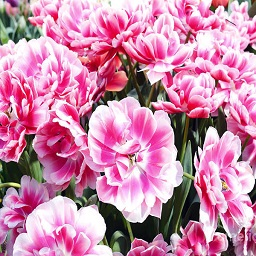

In [17]:
display(Image(image_path))


## Cartoonize images using Python script
Transform the downloaded image using selected style.

In [18]:
styles = "hayao" #@param ["shinkai", "hayao", "paprika"]
#hayao = spirited away
#shinkai = your name


In [ ]:
!python cartoonize.py \
    --styles {styles} \
    --batch_size 1 \
    --comparison_view horizontal

## Compare input with the caroonized result

In [ ]:
if img_filename:
    if ".gif" in img_filename:
        generated_gif = os.path.join(output_image_dir, "comparison", new_img_filename)
        result_path = generated_gif + '.png'
        !cp {generated_gif} {result_path}
    else:
        result_path = os.path.join(output_image_dir, "comparison", new_img_filename)

In [ ]:
display(Image(result_path))

## Download the result


To download only the tranformed image , set `include_original_image` to `no`.

In [ ]:
include_original_image = "no"  #@param {type: "string"}

In [ ]:
from google.colab import files
if include_original_image == "yes":
    output_image_path = os.path.join(output_image_dir, "comparison", new_img_filename)
else:
    output_image_path = os.path.join(output_image_dir, styles, new_img_filename)
files.download(output_image_path)